In [53]:
import numpy as np
import pandas as pd
from data_generator import generator
import networkx as nx
import matplotlib.pyplot as plt
import time 


In [54]:
n_users = 25
n_choices = 3
location_df_path = './sample_hospitals.csv'
# location_df_path = './sample_hospitals_big.csv'

edge_list = generator(n_users, n_choices, location_df_path)

In [45]:
#edge_list[(edge_list["assignment_id"] == 2) or (edge_list["assignment_id"] == 7) or (edge_list["assignment_id"] == 12)]
# filtered_edges = edge_list[(edge_list["assignment_id"] == 2) | (edge_list["assignment_id"] == 7) | (edge_list["assignment_id"] == 12)]
# filtered_edges

,user_id,assignment_id,choice_id,choice_weight
edge_id,,,,
0,1,2,3,1
1,1,2,12,2
2,1,2,7,3
3,2,12,2,1
4,2,12,5,2
5,2,12,14,3
36,13,2,20,1
37,13,2,1,2
38,13,2,19,3


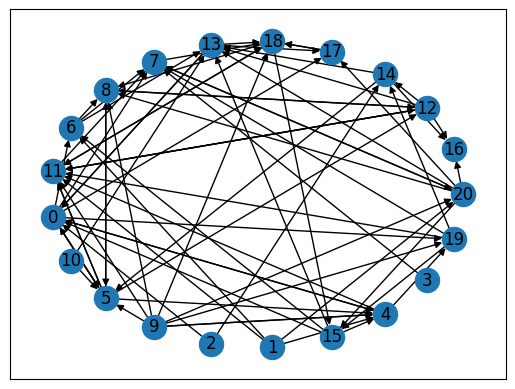

In [55]:
#initalise empty graph
G = nx.MultiDiGraph()

for i in edge_list.index:
    G.add_edge(edge_list.choice_id[i], edge_list.assignment_id[i], weight=edge_list.choice_weight[i])

nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels = True)
plt.show()

In [56]:
start = time.time()

# find all cycles
cycles = list(nx.simple_cycles(G))

# find max cycle length
max_cycle_length = max([len(i) for i in cycles])

# find cycle with min weight of max length
best_cycle = min((i for i in cycles if len(i) == max_cycle_length), key=lambda x: nx.path_weight(G, x, 'weight'))

end = time.time()
runtime = np.round(end-start,2)

print(f'simulation run for {n_users} users with {n_choices} choices each\naverage choice for best cycle: {min(nx.path_weight(G, best_cycle, "weight")/max_cycle_length, 2):.2f}\nbest cycle length: {max_cycle_length}\nbest cycle: {best_cycle}\ntime to compute: {runtime:.2f} seconds')


simulation run for 25 users with 3 choices each
average choice for best cycle: 1.47
best cycle length: 15
best cycle: [0, 4, 19, 15, 6, 7, 20, 17, 18, 8, 5, 11, 12, 14, 13]
time to compute: 0.14 seconds


In [57]:
cycles

[[0, 19, 15, 13, 17, 18, 11, 12, 14, 5, 4],
 [0, 19, 15, 13, 17, 18, 11, 12, 14, 5],
 [0, 19, 15, 13, 17, 18, 11, 12, 8, 5, 4],
 [0, 19, 15, 13, 17, 18, 11, 12, 8, 5],
 [0, 19, 15, 13, 17, 18, 11, 7, 20, 8, 12, 14, 5, 4],
 [0, 19, 15, 13, 17, 18, 11, 7, 20, 8, 12, 14, 5],
 [0, 19, 15, 13, 17, 18, 11, 7, 20, 8, 5, 4],
 [0, 19, 15, 13, 17, 18, 11, 7, 20, 8, 5],
 [0, 19, 15, 13, 17, 18, 8, 12, 14, 5, 4],
 [0, 19, 15, 13, 17, 18, 8, 12, 14, 5],
 [0, 19, 15, 13, 17, 18, 8, 5, 4],
 [0, 19, 15, 13, 17, 18, 8, 5],
 [0, 19, 15, 13],
 [0, 19, 15, 13, 18, 11, 12, 14, 5, 4],
 [0, 19, 15, 13, 18, 11, 12, 14, 5],
 [0, 19, 15, 13, 18, 11, 12, 8, 5, 4],
 [0, 19, 15, 13, 18, 11, 12, 8, 5],
 [0, 19, 15, 13, 18, 11, 7, 20, 8, 12, 14, 5, 4],
 [0, 19, 15, 13, 18, 11, 7, 20, 8, 12, 14, 5],
 [0, 19, 15, 13, 18, 11, 7, 20, 8, 5, 4],
 [0, 19, 15, 13, 18, 11, 7, 20, 8, 5],
 [0, 19, 15, 13, 18, 8, 12, 14, 5, 4],
 [0, 19, 15, 13, 18, 8, 12, 14, 5],
 [0, 19, 15, 13, 18, 8, 5, 4],
 [0, 19, 15, 13, 18, 8, 5],
 [0, 1

In [64]:
weights = []
avg_weight = []
cycle_len = []
for i in cycles:
    path_wt = nx.path_weight(G,i,'weight')
    weights.append(path_wt)
    avg_wt = len(i)/path_wt
    avg_wt = path_wt/len(i)
    avg_weight.append(avg_wt)
    cycle_len.append(len(i))

In [65]:
data = {'cycle': cycles,
        'weight': weights,
        "avg_weight_per_swap": avg_weight,
        "cycle_len": cycle_len}

cycle_df = pd.DataFrame(data)

In [79]:
cycle_df = cycle_df[cycle_df.avg_weight_per_swap<=1]
cycle_df = cycle_df.sort_values(by=["cycle_len", "avg_weight_per_swap"], ascending=[False, True])

In [80]:
cycle_df.head(20)

,cycle,weight,avg_weight_per_swap,cycle_len
2110,"[0, 5, 4, 19, 15, 6, 13]",7,1.000000,7
2108,"[0, 5, 4, 19, 15, 13]",5,0.833333,6
790,"[0, 4, 19, 15, 6, 13]",6,1.000000,6
2266,"[0, 5, 11, 18, 15, 13]",6,1.000000,6
776,"[0, 4, 19, 15, 13]",4,0.800000,5
2109,"[0, 5, 4, 19, 15]",4,0.800000,5
2267,"[0, 5, 11, 18, 15]",5,1.000000,5
3153,"[6, 13, 17, 18, 15]",5,1.000000,5
783,"[0, 4, 19, 15]",3,0.750000,4
3077,"[5, 11, 12, 8]",3,0.750000,4


In [5]:
filtered_cycles = cycles
cycle_wts = [nx.path_weight(G, cycle, 'weight') for cycle in cycles]
cycle_lens = [len(cycle) for cycle in cycles]

/var/folders/c7/dcyx4ss130ldp4lp9ph0v16c0000gn/T/ipykernel_97904/2973409684.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


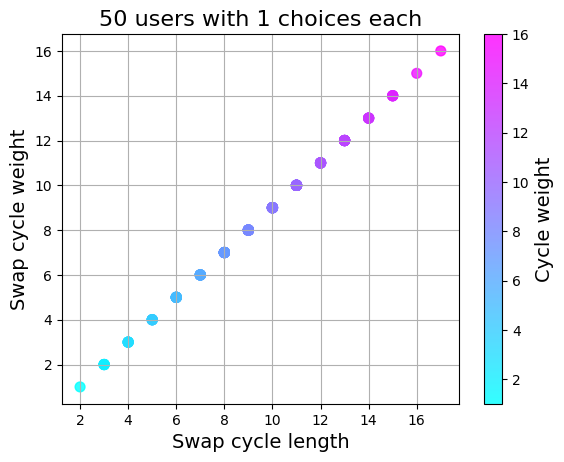

In [6]:
# Define color map for scatter points based on weight
cmap = plt.cm.get_cmap('cool')

# Scatter plot of cycle length vs weight
plt.scatter(cycle_lens, cycle_wts, s=50, c=cycle_wts, cmap=cmap, alpha=0.8)

# Set axis labels and title with larger font size
plt.xlabel('Swap cycle length', fontsize=14)
plt.ylabel('Swap cycle weight', fontsize=14)
plt.title(f"{n_users} users with {n_choices} choices each", fontsize=16)

# Add grid to the plot
plt.grid(True)

# Set color bar to show weight values
cbar = plt.colorbar()
cbar.ax.set_ylabel('Cycle weight', fontsize=14)

# Show the plot
plt.show()

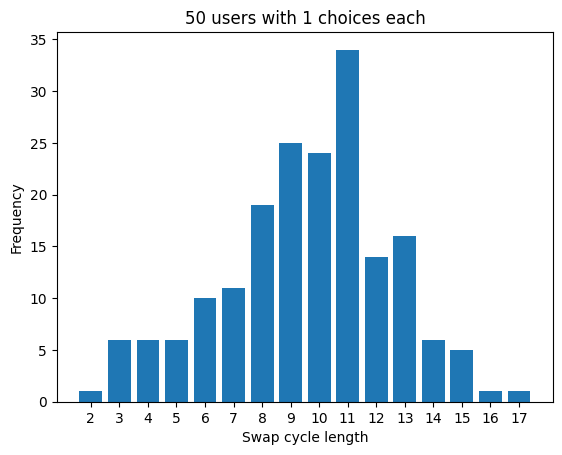

In [7]:
plt.hist(cycle_lens, bins=range(min(cycle_lens), max(cycle_lens) + 2), align='left', rwidth=0.8)
plt.xlabel('Swap cycle length')
plt.ylabel('Frequency')
plt.title(f"{n_users} users with {n_choices} choices each")
plt.xticks(range(min(cycle_lens), max(cycle_lens) + 1))
plt.show()

In [6]:
import os

def find_longest_csv(directory):
    longest_length = 0
    longest_filename = None

    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.csv'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    if len(lines) > longest_length:
                        longest_length = len(lines)
                        longest_filename = filename

    return longest_length, longest_filename

# Example usage:
directory_path = 'swaps'
length, filename = find_longest_csv(directory_path)

if length > 0:
    print(f"The longest CSV file is '{filename}' with {length} lines.")
else:
    print("No CSV files found in the directory.")


The longest CSV file is '1694979620_1.csv' with 11 lines.
